
### titanic

#### 필요한 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas_profiling
from pandas_profiling import ProfileReport

시각화 라이브러리
(그래프 및 상관관계)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#colab의 pandas 버전 확인
pd.__version__

'1.1.5'

#1. 데이터 분석

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



   
Data Dictionary  
  
* 예측 변수(Target / Lable / Class) - y
 - survived : 생존=1, 죽음=0

* 설명 변수 - x 
 - PassengerId	: 승객 고유번호
 - Name	: 성명
 - Sex : 성별(male, female)
 - Age : 연령
 - pclass : 승객 등급(1등급=1, 2등급=2, 3등급=3)
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호(alphabat + integer)
 - Fare	: 요금
 - cabin : 선실 번호 (NaN: Not a Number)
 - embarked : 탑승장소(S=Southhampton, C=Cherbourg, Q=Queenstown)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape
#891개의 승객 정보, 12개의 feature 정보

(891, 12)

In [7]:
test.shape
#418명의 승객 정보를 받아 각 승객의 생사 판단

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# pandas에서 train 데이터 셋에서 null 항목을 표시하는 방법
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#from pandas_profiling import ProfileReport
#k = ProfileReport(train)
#k

####각 feature 별로 생존 여부 비교 차트 만들기

In [13]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

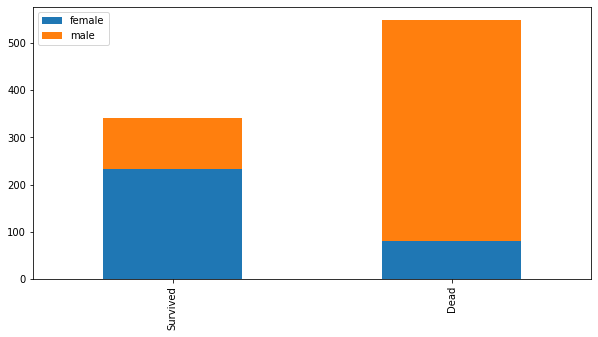

In [14]:
bar_chart('Sex')

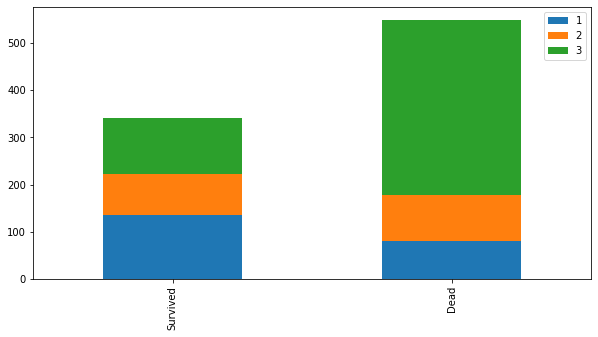

In [15]:
bar_chart('Pclass')

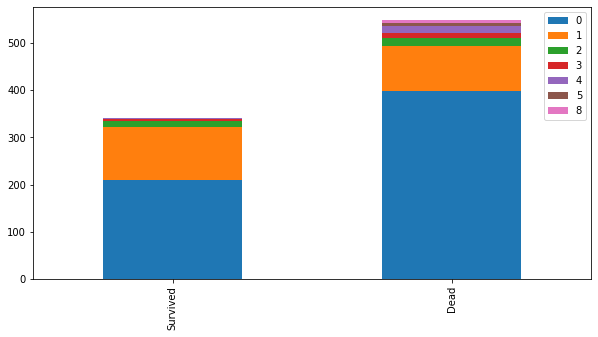

In [16]:
bar_chart('SibSp')

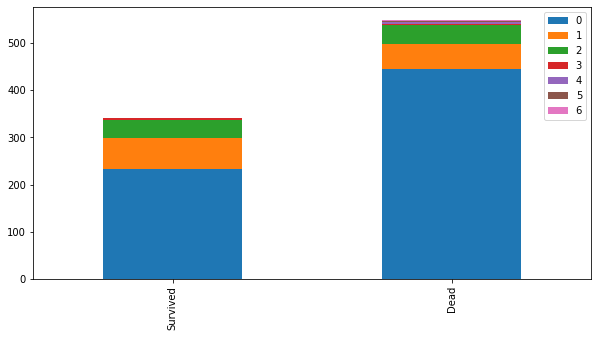

In [17]:
bar_chart('Parch')

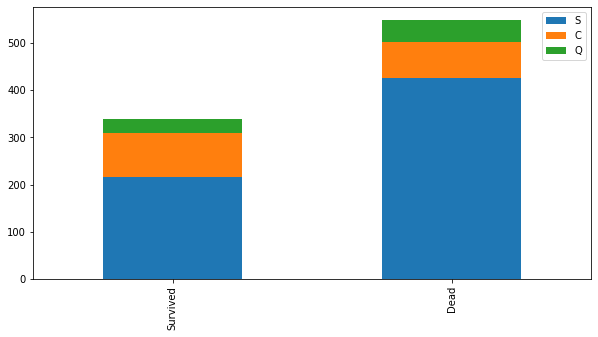

In [18]:
bar_chart('Embarked')
# 선착장 탑승 여부는 가설을 세우기가 애매했다.

#### Colab에서 Pandas_profiling 사용하기
https://rk1993.tistory.com/entry/Python%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D-EDA-%EC%89%BD%EA%B2%8C-%ED%95%98%EA%B8%B0-pandasprofiling

In [19]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [20]:
#profile 파일 만들기
#profile = ProfileReport(train,title="Titanic Survivor")

#2. Feature Engineering
= 변수조작

데이터를 그대로 이용하기 어려운 경우,

변수에 적절한 과정을 거쳐 분석하기 좋게 만들기

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 가장 먼저 확인해볼 Name -> 항목들을(ex. Mr, Mrs, Ms) 빼둘 것임.

In [22]:
# train, test 데이터를 결합 -> 한 번에 데이터셋을 변형시킬 수 있다.
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Capt          1
Sir           1
Don           1
Countess      1
Jonkheer      1
Ms            1
Lady          1
Name: Title, dtype: int64

In [24]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [25]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


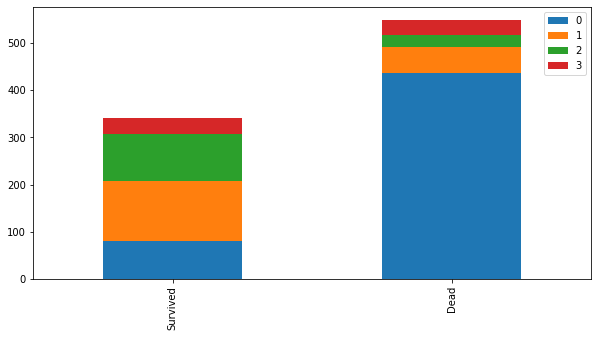

In [27]:
bar_chart('Title')

In [28]:
# Name 에서 Title 들을 빼냈기 때문에, 더이상 필요가 없으므로 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


2. 성별을 숫자로 바꾸기

In [31]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder를 이용하여 성별을 라벨로 코딩(female = 0, male = 1)
train["Sex"] = LabelEncoder().fit_transform(train["Sex"])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test["Sex"] = LabelEncoder().fit_transform(test["Sex"])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,2


In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [34]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

3. 누락된 나이 정보들을 채우기?
어떻게 채워 넣어야 할까?
- null 값에 해당 각 타이틀 별 평균 나이를 대입

In [35]:
#Age 값이 NULL 일 경우, 각 Title 별로 중간값(median)을 넣기.
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [36]:
train.groupby("Title")["Age"].transform("median")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

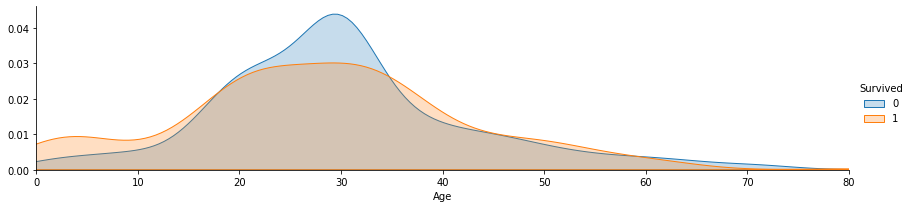

In [39]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()
# 0 : deal, 1: survive

4. 선착장(Embarked) 데이터

In [40]:
# Embarked값을 확인하고 건수를 카운트
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
# 누락된 Embarked값을 최빈값으로 대체
# 최빈값 : 가장 많은 빈도로, 가장 많은 개수로 나타나는 값
train["Embarked"].fillna('S', inplace=True)
test["Embarked"].fillna('S', inplace=True)

In [42]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [43]:
# null data의 카운트
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [44]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,0,0


In [46]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,0,2


6. Fare (티켓 가격)

In [51]:
#Pclass(각 등급)의 티켓가격 가운데 값을 Fare 빈 값에 넣어보기
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [53]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [54]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

7. Cabin (객실 번호) : 일단 제외시켰음

In [48]:
del train['Cabin']

In [49]:
del test['Cabin']

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,0,0


9. 티켓 / 가족 수: 역시 제외시켰음

In [ ]:
del train['Ticket']
del test['Ticket']

In [67]:
del train['SibSp']
del test['SibSp']
del train['Parch']
del test['Parch']


In [68]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,1,0,3,1,22.0,7.2500,0,0
1,2,1,1,0,38.0,71.2833,1,2
2,3,1,3,0,26.0,7.9250,0,1
3,4,1,1,0,35.0,53.1000,0,2
4,5,0,3,1,35.0,8.0500,0,0


In [69]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [70]:
train_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,1,3,1,22.0,7.2500,0,0
1,2,1,0,38.0,71.2833,1,2
2,3,3,0,26.0,7.9250,0,1
3,4,1,0,35.0,53.1000,0,2
4,5,3,1,35.0,8.0500,0,0


#3. 분류

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

랜덤 포레스트

In [86]:
clf = RandomForestClassifier(n_estimators=7)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.85393258 0.74157303 0.7752809  0.76404494 0.83146067
 0.78651685 0.79775281 0.82022472 0.83146067]


In [87]:
# 랜덤 포레스트 스코어 평균 측정
round(np.mean(score)*100, 2)

80.02

SVM

In [75]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.63333333 0.70786517 0.69662921 0.61797753 0.71910112 0.68539326
 0.65168539 0.68539326 0.59550562 0.57303371]


In [76]:
# SVM 스코어 평균 측정
round(np.mean(score)*100,2)

65.66

####4. 테스트

In [88]:
clf = RandomForestClassifier(7)
clf.fit(train_data, target)

test_data = test.copy()

In [89]:
prediction = clf.predict(test_data)

ValueError: ignored

아름다운 도전으로 남았지만...
#참고해보면 좋을만한 것

https://images.squarespace-cdn.com/content/5006453fe4b09ef2252ba068/1351660113175-514SN9PXFWB9N2MNB8DV/TItanic-Survival-Infographic.jpg?format=1500w&content-type=image%2Fjpeg

=> PClass(승객 등급), Cabin(방의 위치): 사실 중요한 정보로 작용할 수 있었다.

=> 단순히 버릴 것이 아닌, Classifier에 넣으면 좋았겠음.


SibSp, Parch -> 부모, 아이, 남매 수의 유무는, 실제 탈출 과정에서

탈출 우선순위에 중요한 영향을 끼쳤을 것